## Neural networks with Python

Author:
    Oscar Hernández Terán
    
Bachelor's Degree: 
    Geophysical Engineer

In [1]:
# Data processing
# ==============================================================================
import numpy as np
import pandas as pd

# Graphs
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

# Modeling
# ==============================================================================
from sklearn.datasets import make_blobs
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import multiprocessing

# Warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

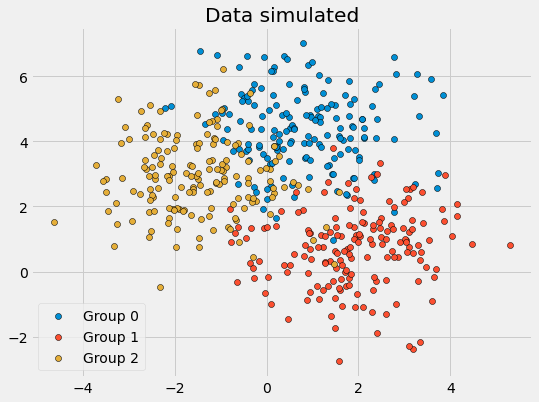

In [2]:
# Data simulated
# ==============================================================================
# Generate isotropic Gaussian blobs for clustering.
X, y = make_blobs(n_samples=500, n_features=2, centers=3, 
                  cluster_std=1.2, shuffle=True, random_state=0)

# Plot 
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
for i in np.unique(y):
    ax.scatter(
        x = X[y == i, 0],
        y = X[y == i, 1], 
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black', 
        label= f"Group {i}"
    )
    
ax.set_title('Data simulated')
ax.legend();

In [9]:
# Modeling
# ==============================================================================
# We define the architecture network
# 
# Multi-layer Perceptron classifier.
#
# This model optimizes the log-loss function using LBFGS or stochastic gradient descent.
# 
# We created 4 MLP models with different architectures to test the performance.
model_1 = MLPClassifier(hidden_layer_sizes=(1), learning_rate_init=0.01, solver = 'lbfgs', 
                         max_iter = 1000, random_state = 123)

model_2 = MLPClassifier(hidden_layer_sizes=(10), learning_rate_init=0.01, solver = 'lbfgs', 
                         max_iter = 1000, random_state = 123)

model_3 = MLPClassifier(hidden_layer_sizes=(10, 10), learning_rate_init=0.01, solver = 'lbfgs', 
                         max_iter = 1000, random_state = 123)

model_4 = MLPClassifier(hidden_layer_sizes=(50,50), learning_rate_init=0.01, solver = 'lbfgs', 
                         max_iter = 1000, random_state = 123)

# We train the four models
model_1.fit(X=X, y=y)
model_2.fit(X=X, y=y)
model_3.fit(X=X, y=y)
model_4.fit(X=X, y=y)

MLPClassifier(hidden_layer_sizes=(50, 50), learning_rate_init=0.01,
              max_iter=1000, random_state=123, solver='lbfgs')

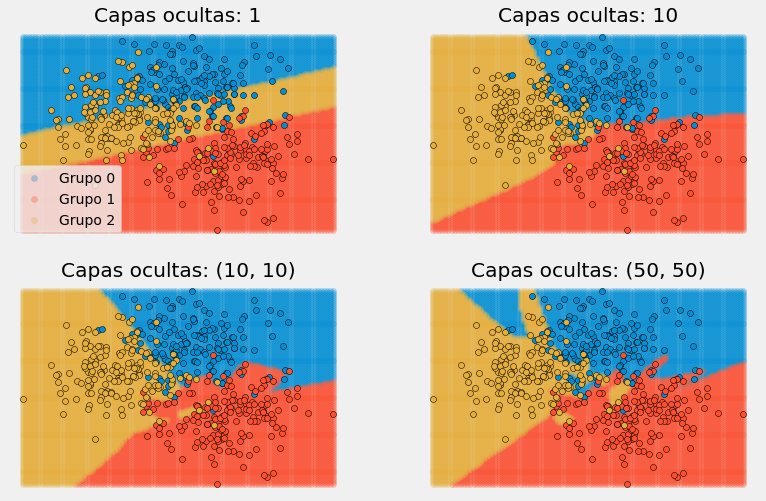

In [10]:
# Gráfico de predicciones
# ==============================================================================
fig, axs = plt.subplots(2, 2, figsize=(12,8))
axs = axs.flatten()
grid_x1 = np.linspace(start=min(X[:, 0]), stop=max(X[:, 0]), num=100)
grid_x2 = np.linspace(start=min(X[:, 1]), stop=max(X[:, 1]), num=100)
xx, yy = np.meshgrid(grid_x1, grid_x2)
X_grid = np.column_stack([xx.flatten(), yy.flatten()])

for i, modelo in enumerate([model_1, model_2, model_3, model_4]):
    
    predicciones = modelo.predict(X_grid)
    
    for j in np.unique(predicciones):
        axs[i].scatter(
            x = X_grid[predicciones == j, 0],
            y = X_grid[predicciones == j, 1], 
            c = plt.rcParams['axes.prop_cycle'].by_key()['color'][j],
            #marker = 'o',
            alpha = 0.3,
            label= f"Grupo {j}"
        )

    for j in np.unique(y):
        axs[i].scatter(
            x = X[y == j, 0],
            y = X[y == j, 1], 
            c = plt.rcParams['axes.prop_cycle'].by_key()['color'][j],
            marker    = 'o',
            edgecolor = 'black'
        )
        
    axs[i].set_title(f"Capas ocultas: {modelo.hidden_layer_sizes}")
    axs[i].axis('off')
axs[0].legend();